In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataMites/wine.csv')

In [103]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [104]:
data['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [105]:
data.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [107]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [108]:
!pip install sweetviz

In [109]:
import sweetviz as sv
my_report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [110]:
my_report.show_html("Wine.html")
my_report.show_html()

Report Wine.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [111]:
box = data.drop('Wine', axis=1)

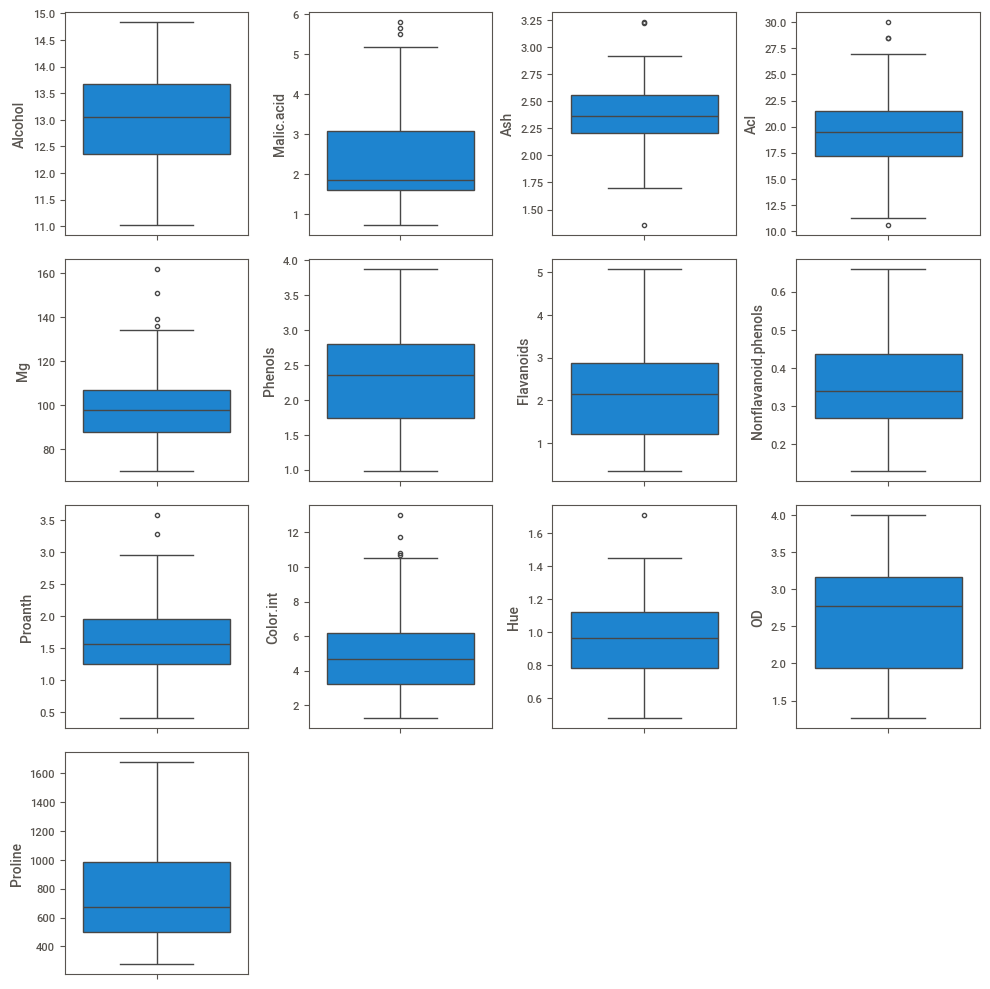

In [112]:
plt.figure(figsize=(10,10))
plotnum = 1
for column in box.columns:
  if plotnum <= 16:
    ax = plt.subplot(4,4,plotnum)
    sns.boxplot(box[column])
    plotnum += 1
plt.tight_layout()


In [113]:
data['Wine'].skew()

0.10743112358094281

In [114]:
import numpy as np

def handle_outliers(data):
    """
    Handle outliers in the data using the specified methods.

    Parameters:
        data (pandas.Series): Input data containing outliers.

    Returns:
        pandas.Series: Data with outliers replaced.
    """
    skewness = data.skew()  # Calculate skewness

    if -0.5 <= skewness <= 0.5:  # If skewness is between -0.5 and 0.5
        # Calculate mean and standard deviation
        mean = np.mean(data)
        std_dev = np.std(data)

        # Define lower and upper bounds using 3-sigma rule
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev

        # Replace outliers with mean using loc method
        data.loc[(data < lower_bound) | (data > upper_bound)] = mean
    else:
        # Calculate first and third quartiles
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)

        # Calculate interquartile range (IQR)
        IQR = Q3 - Q1

        # Define lower and upper bounds using IQR method
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with median using loc method
        median = np.median(data)
        data.loc[(data < lower_bound) | (data > upper_bound)] = median

    return data


In [115]:
data1 = data.drop('Wine',axis = True)

In [116]:
import pandas as pd

# Assuming 'data' is your DataFrame containing all columns
for column in data1.columns:
    data1[column] = handle_outliers(data1[column])

# Now all columns in 'data' have outliers handled


<ipython-input-114-4115024d9bd6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[(data < lower_bound) | (data > upper_bound)] = mean
<ipython-input-114-4115024d9bd6>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[(data < lower_bound) | (data > upper_bound)] = median


In [117]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: >

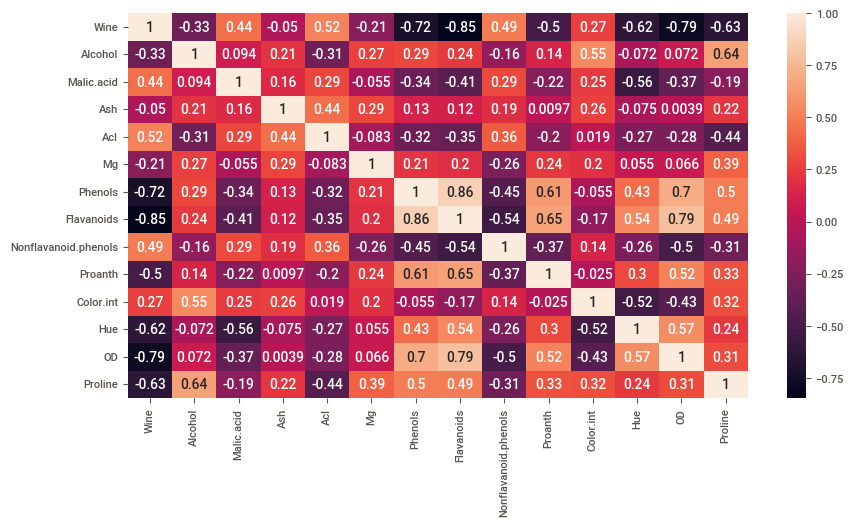

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

<Axes: >

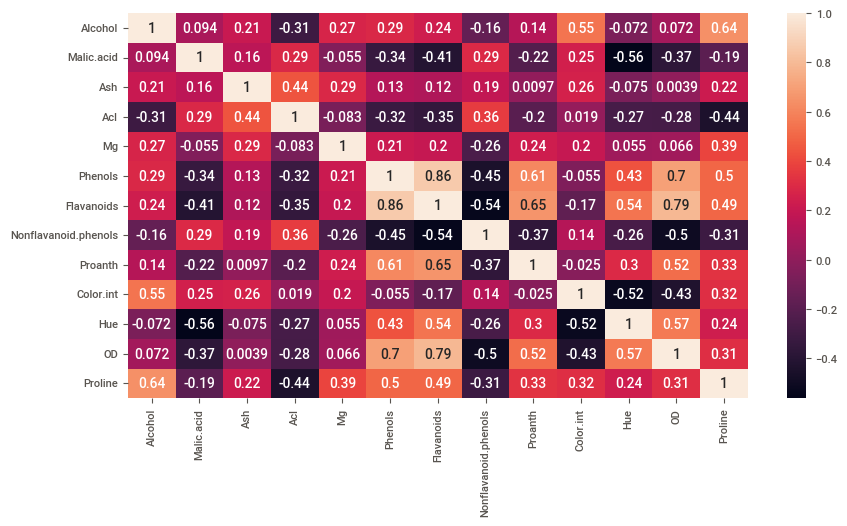

In [119]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop('Wine',axis=1).corr(),annot=True)

In [128]:
X = data1
y = data['Wine']

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
y_preds = clf.predict(X_test)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.73      0.79      0.76        14
           3       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.68      0.67      0.67        36
weighted avg       0.73      0.72      0.72        36



In [134]:
from sklearn.ensemble import BaggingClassifier

clf2 = BaggingClassifier(base_estimator=clf,n_estimators=300)
clf2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=300)

In [135]:
y_preds2 = clf2.predict(X_test)

In [136]:
print(classification_report(y_test,y_preds2))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.82      0.64      0.72        14
           3       0.42      0.62      0.50         8

    accuracy                           0.72        36
   macro avg       0.72      0.71      0.70        36
weighted avg       0.77      0.72      0.74        36

